In [10]:
import torch
import numpy as np

In [1]:
import ast
import torch
import numpy as np
import os, sys
from thop import profile
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary

from Utils import *
from Models import *

In [12]:
(torch.zeros(100,100) - 1)/np.sqrt(11/36)

tensor([[-1.8091, -1.8091, -1.8091,  ..., -1.8091, -1.8091, -1.8091],
        [-1.8091, -1.8091, -1.8091,  ..., -1.8091, -1.8091, -1.8091],
        [-1.8091, -1.8091, -1.8091,  ..., -1.8091, -1.8091, -1.8091],
        ...,
        [-1.8091, -1.8091, -1.8091,  ..., -1.8091, -1.8091, -1.8091],
        [-1.8091, -1.8091, -1.8091,  ..., -1.8091, -1.8091, -1.8091],
        [-1.8091, -1.8091, -1.8091,  ..., -1.8091, -1.8091, -1.8091]])

In [11]:
np.sqrt(11/36)

0.5527707983925667

In [2]:
checkpoint = torch.load('./Checkpoint/micronet_ver2.t7')

In [3]:
checkpoint.keys()

dict_keys(['net_init', 'net1', 'net2', 'net3', 'net4', 'train_losses', 'train_accuracy', 'test_losses', 'test_accuracy', 'flops_params', 'Score'])

In [4]:
net = MicroNet(num_classes = 100, add_se = True, Activation = 'HSwish')

In [5]:
net.load_state_dict(checkpoint['net4'], strict = False)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [6]:
def bn_weight_norm(model):
    point_bn_weights = []
    depth_bn_weights = []

    
    for name, p in model.named_parameters():
        if 'layer' in name:
            if 'bn1' in name and 'weight' in name:
                point_bn_weights += list(p.cpu().data.numpy())
            elif 'bn3' in name and 'weight' in name:
                point_bn_weights += list(p.cpu().data.numpy())
            elif 'bn2' in name and 'weight' in name:
                depth_bn_weights += list(p.cpu().data.numpy().flatten())
                    
    return point_bn_weights, depth_bn_weights

In [7]:
point_bn_weights, depth_bn_weights = bn_weight_norm(net)

(array([  0.,   0.,   0.,   4.,   2.,   7.,  11.,  30.,  55.,  22., 165.,
        332., 233., 146., 163., 182., 257., 298., 321., 314., 213., 111.,
        120.,  64.,  25.,  24.,  16.,  17.,   9.,   9.,   6.,   7.,   2.,
          1.,   4.,   1.,   2.,   1.,   0.,   2.,   2.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.]),
 array([-1.        , -0.89795918, -0.79591837, -0.69387755, -0.59183673,
        -0.48979592, -0.3877551 , -0.28571429, -0.18367347, -0.08163265,
         0.02040816,  0.12244898,  0.2244898 ,  0.32653061,  0.42857143,
         0.53061224,  0.63265306,  0.73469388,  0.83673469,  0.93877551,
         1.04081633,  1.14285714,  1.24489796,  1.34693878,  1.44897959,
         1.55102041,  1.65306122,  1.75510204,  1.85714286,  1.95918367,
         2.06122449,  2.16326531,  2.26530612,  2.36734694,  2.46938776,
         2.57142857,  2.67346939,  2.7755102 ,  2.87755102,  2.97959184,
         3.08163265,  3.18367347,  3.28571429,  3.3877551 ,  3.48979592,
       

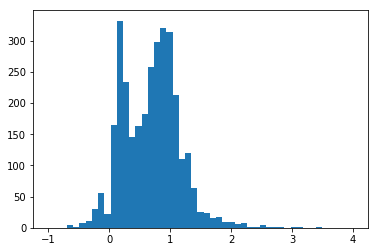

In [8]:
plt.hist(point_bn_weights, bins=np.linspace(-1,4,50))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   5., 133., 169., 104., 147., 389., 502., 294., 173.,
         86.,  59.,  27.,  17.,  13.,  11.,  12.,   9.,  10.,   7.,  12.,
          8.,   5.,   4.,   4.,   8.,   1.,   1.,   2.,   0.,   1.,   2.,
          0.,   1.,   1.,   1.,   0.]),
 array([-1.        , -0.91836735, -0.83673469, -0.75510204, -0.67346939,
        -0.59183673, -0.51020408, -0.42857143, -0.34693878, -0.26530612,
        -0.18367347, -0.10204082, -0.02040816,  0.06122449,  0.14285714,
         0.2244898 ,  0.30612245,  0.3877551 ,  0.46938776,  0.55102041,
         0.63265306,  0.71428571,  0.79591837,  0.87755102,  0.95918367,
         1.04081633,  1.12244898,  1.20408163,  1.28571429,  1.36734694,
         1.44897959,  1.53061224,  1.6122449 ,  1.69387755,  1.7755102 ,
         1.85714286,  1.93877551,  2.02040816,  2.10204082,  2.18367347,
         2.26530612,  2.34693878,  2.42857143,  2.51020408,  2.59183673,
       

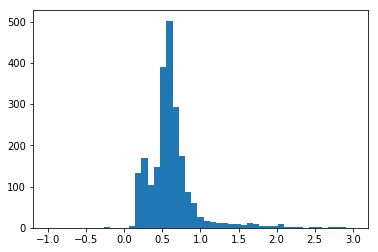

In [9]:
plt.hist(depth_bn_weights, bins=np.linspace(-1,3,50))

In [20]:
def bn_weight_square_sum(model):
    point_bn_weights1 = []
    point_bn_weights3 = []
    depth_bn_weights = []

    
    for name, p in model.named_parameters():
        if 'layer' in name:
            if 'bn1' in name and 'weight' in name:
                n = len(p.cpu().data.numpy())
                point_bn_weights1.append(np.sum(np.square((p.cpu().data.numpy())))/n)
            elif 'bn3' in name and 'weight' in name:
                n = len(p.cpu().data.numpy())
                point_bn_weights3.append(np.sum(np.square((p.cpu().data.numpy())))/n)
            elif 'bn2' in name and 'weight' in name:
                n = len(p.cpu().data.numpy())
                depth_bn_weights.append(np.sum(np.square((p.cpu().data.numpy().flatten())))/n)
                    
    return point_bn_weights1, depth_bn_weights, point_bn_weights3

In [21]:
p1, d, p3 = bn_weight_square_sum(net)

In [25]:
np.mean(p1), np.mean(d), np.mean(p3)

(0.6802304243349065, 0.61556065153895, 1.174073428806746)

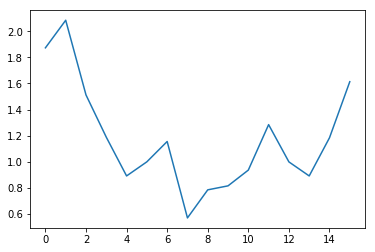

In [23]:
plt.plot(p3)

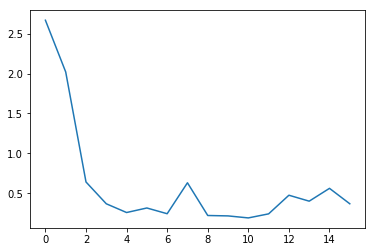

In [24]:
plt.plot(d)